In [3]:
pip install surprise

     |████████████████████████████████| 11.8MB 272kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617558 sha256=247f72522cf5dcd62486cf0ca046e52a6470eff8b91a34a783356c1b3c00de81
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [5]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import json
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)
df = pd.read_json('/content/drive/MyDrive/project5125/Luxury_Beauty_5.json', orient='record',lines=True)
#df.to_csv('/content/drive/MyDrive/project5125/orignalData.csv')
df.head()


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It doesnt stay on or protect your hands through washin...,Beautiful Fragrance,1515110400,NaN,NaN
1,5,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin, stays on a long time, a little goes a long long w...",wonderful hand lotion,1491350400,NaN,NaN
2,5,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks in all the way leaving hands super soft.",Best hand cream around,1490572800,NaN,NaN
3,5,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,"Great hand lotion. Soaks right in and leaves skin super soft. No greasy residue, great scent!",Great hand lotion!,1488240000,NaN,NaN


In [6]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34278 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         34278 non-null  int64  
 1   verified        34278 non-null  bool   
 2   reviewTime      34278 non-null  object 
 3   reviewerID      34278 non-null  object 
 4   asin            34278 non-null  object 
 5   style           16841 non-null  object 
 6   reviewerName    34278 non-null  object 
 7   reviewText      34265 non-null  object 
 8   summary         34263 non-null  object 
 9   unixReviewTime  34278 non-null  int64  
 10  vote            6532 non-null   float64
 11  image           617 non-null    object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.9+ MB


overall           False
verified          False
reviewTime        False
reviewerID        False
asin              False
style              True
reviewerName      False
reviewText         True
summary            True
unixReviewTime    False
vote               True
image              True
dtype: bool

In [7]:
df=df.dropna(axis = 0, subset = ['reviewText'] )
df=df[df['verified']==True]

In [8]:
series=df.groupby('reviewerID').apply(lambda x: '.'.join(x['reviewText']))
df_={'userid':series.index, 'review': series.values}
df_clustering=pd.DataFrame(df_)
df_clustering.head()


,userid,review
0,A0488385844WNV2OWO9X,Have used Jane Iredale for over 10 years. I love all her products..Can't say enough about Jane I...
1,A0916357J9P21ZUYUZO6,My skin feels amazing! First full day of using this im in love. Im so glad i bought the $$.it w...
2,A0976794S8VOYNT78YEM,The color is nice and stays on a long time unlike other polishes I have tried. Would definitely ...
3,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...
4,A102300ZYSDHRR,Great Night Cream!.Perfect Mask!.I love this spray to my face and neck as a little refresher!.Gr...


In [9]:
!pip install transformers

     |████████████████████████████████| 2.2MB 5.8MB/s 
     |████████████████████████████████| 3.3MB 32.3MB/s 
     |████████████████████████████████| 870kB 42.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.44-cp37-none-any.whl size=886084 sha256=0d4433a873e90f67b7e4d6ba8a516fddcb0a53854d00025406f7cbf0ddd9e3b3
  Stored in directory: /root/.cache/pip/wheels/3e/fb/c0/13ab4d63d537658f448366744654323077c4d90069b6512f3c
Successfully built sacremoses


In [10]:
#transform
import transformers
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')


In [11]:
def encode(sample_text):
  encoding = tokenizer.encode_plus(
      sample_text,
      max_length=1000,
      add_special_tokens=True,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_token_type_ids=False
  )
  return encoding['input_ids']

In [12]:
df_clustering['reviewToken']=df_clustering.review.apply(encode)
df_clustering.head()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2079: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


,userid,review,reviewToken
0,A0488385844WNV2OWO9X,Have used Jane Iredale for over 10 years. I love all her products..Can't say enough about Jane I...,"[101, 2031, 2109, 4869, 20868, 11960, 2571, 2005, 2058, 2184, 2086, 1012, 1045, 2293, 2035, 2014..."
1,A0916357J9P21ZUYUZO6,My skin feels amazing! First full day of using this im in love. Im so glad i bought the $$.it w...,"[101, 2026, 3096, 5683, 6429, 999, 2034, 2440, 2154, 1997, 2478, 2023, 10047, 1999, 2293, 1012, ..."
2,A0976794S8VOYNT78YEM,The color is nice and stays on a long time unlike other polishes I have tried. Would definitely ...,"[101, 1996, 3609, 2003, 3835, 1998, 12237, 2006, 1037, 2146, 2051, 4406, 2060, 3907, 2229, 1045,..."
3,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...,"[101, 1045, 2288, 1037, 7099, 1997, 2023, 4933, 2007, 2019, 2344, 1997, 7350, 4469, 10491, 1012,..."
4,A102300ZYSDHRR,Great Night Cream!.Perfect Mask!.I love this spray to my face and neck as a little refresher!.Gr...,"[101, 2307, 2305, 6949, 999, 1012, 3819, 7308, 999, 1012, 1045, 2293, 2023, 12509, 2000, 2026, 2..."


Text(0, 0.5, 'wcss')

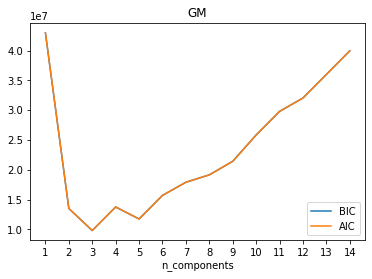

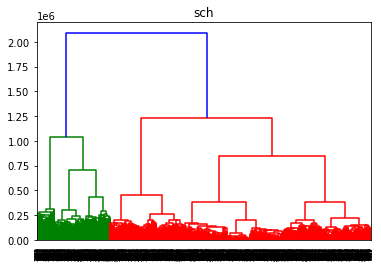

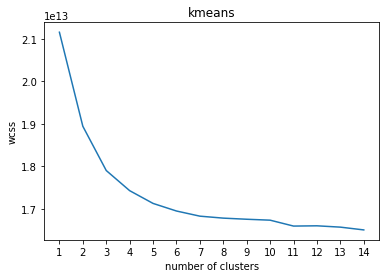

In [13]:
#clustering
import numpy as np
from sklearn.mixture import GaussianMixture as GM
import matplotlib.pyplot as plt

n_components=np.arange(1,15)
review_data=[]
for i in df_clustering.reviewToken:
  review_data.append(i)
review_data=np.array(review_data)
ems=[GM(n_components=n, covariance_type='full', random_state=0).fit(review_data) for n in n_components]
plt.figure()
plt.plot(n_components, [em.bic(review_data) for em in ems], label='BIC')
plt.plot(n_components, [em.bic(review_data) for em in ems], label='AIC')
plt.xticks(ticks=n_components)
plt.legend(loc='best')
plt.xlabel('n_components')
plt.title('GM')

import scipy.cluster.hierarchy as sch
plt.figure()
dendrogram=sch.dendrogram(sch.linkage(review_data, method='ward'))
plt.title('sch')

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(review_data)
  wcss.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,15), wcss)
plt.title('kmeans')
plt.xlabel('number of clusters')
plt.xticks(ticks=range(1,15))
plt.ylabel('wcss')

In [15]:
from sklearn.cluster import AgglomerativeClustering as Agg
from sklearn import metrics
kmeans=KMeans(n_clusters=3, random_state=1)
kmeans.fit(review_data)
kmeans_label=kmeans.predict(review_data)
df_clustering['kmeans_label']=kmeans_label

em=GM(n_components=3, covariance_type='full',random_state=1)
em.fit(review_data)
em_label=em.predict(review_data)
df_clustering['em_label']=em_label

hier=Agg(n_clusters=3, affinity='euclidean', linkage='ward')
hier.fit(review_data)
hier_label=hier.fit_predict(review_data)
df_clustering['hier_label']=hier_label


labels=['kmeans_label','em_label','hier_label']
score=dict()
def Silhouette(label_i):
  silhouette=metrics.silhouette_score(review_data, df_clustering[label_i], metric='euclidean')
  print(f'Silhouette of {label_i}: {silhouette}')
  score[label_i]=silhouette
  return score

for label in labels:
  Silhouette(label)

df_clustering.head()


Silhouette of kmeans_label: 0.16522584360227233
Silhouette of em_label: 0.17541126750093278
Silhouette of hier_label: 0.13535623187876036


,userid,review,reviewToken,kmeans_label,em_label,hier_label
0,A0488385844WNV2OWO9X,Have used Jane Iredale for over 10 years. I love all her products..Can't say enough about Jane I...,"[101, 2031, 2109, 4869, 20868, 11960, 2571, 2005, 2058, 2184, 2086, 1012, 1045, 2293, 2035, 2014...",0,0,2
1,A0916357J9P21ZUYUZO6,My skin feels amazing! First full day of using this im in love. Im so glad i bought the $$.it w...,"[101, 2026, 3096, 5683, 6429, 999, 2034, 2440, 2154, 1997, 2478, 2023, 10047, 1999, 2293, 1012, ...",0,0,2
2,A0976794S8VOYNT78YEM,The color is nice and stays on a long time unlike other polishes I have tried. Would definitely ...,"[101, 1996, 3609, 2003, 3835, 1998, 12237, 2006, 1037, 2146, 2051, 4406, 2060, 3907, 2229, 1045,...",1,1,1
3,A1004703RC79J9,I got a sample of this stuff with an order of Derby Extra blades. I normally use Art of Shaving...,"[101, 1045, 2288, 1037, 7099, 1997, 2023, 4933, 2007, 2019, 2344, 1997, 7350, 4469, 10491, 1012,...",0,0,2
4,A102300ZYSDHRR,Great Night Cream!.Perfect Mask!.I love this spray to my face and neck as a little refresher!.Gr...,"[101, 2307, 2305, 6949, 999, 1012, 3819, 7308, 999, 1012, 1045, 2293, 2023, 12509, 2000, 2026, 2...",1,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'em')

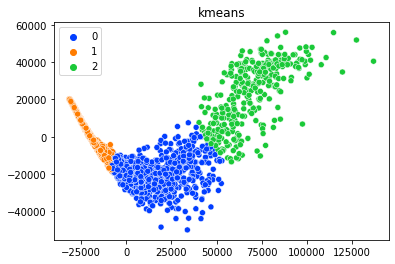

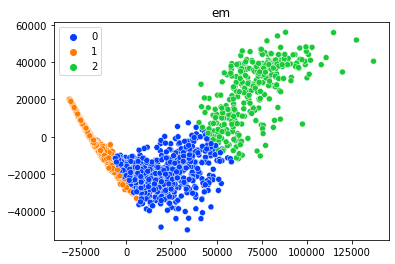

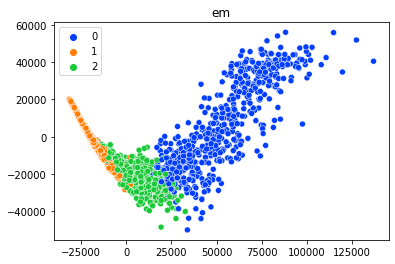

In [16]:
from sklearn.decomposition import PCA
import seaborn as sns
pca=PCA(n_components=2)
review_data_plt=pca.fit_transform(review_data)

plt.figure()
palette = sns.color_palette('bright', len(set(kmeans_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=kmeans_label, legend='full', palette=palette)
plt.title('kmeans')

plt.figure()
palette = sns.color_palette('bright', len(set(em_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=em_label, legend='full', palette=palette)
plt.title('em')

plt.figure()
palette = sns.color_palette('bright', len(set(hier_label)))
sns.scatterplot(review_data_plt[:,0], review_data_plt[:,1], hue=hier_label, legend='full', palette=palette)
plt.title('em')


In [71]:
clustering ={'userID': list(df_clustering.userid),
             'clustering': list(df_clustering.em_label)}
df_=pd.DataFrame(clustering)
df_.head()
df_.shape

(2750, 2)

In [73]:
rating_dict = {'userID': list(df.reviewerID),
               'itemID': list(df.asin),
               'rating': list(df.overall)}
df2 = pd.DataFrame(rating_dict)
df2.shape


(17750, 3)

In [75]:
df3=df2.join(df_.set_index('userID'), on='userID')
df3.head()
df3.shape
#同一个clustering 的 dataframe( userID, itemID, rating) 当作 data 送进训练库


(17750, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'rating')

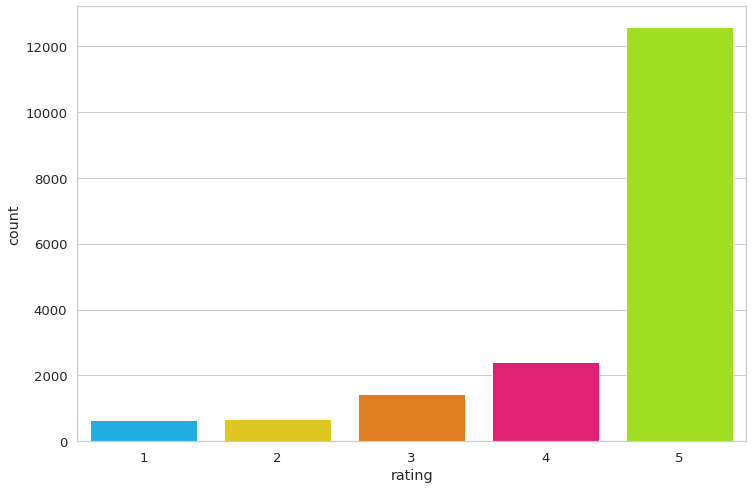

In [20]:
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors=['#01BEFE','#FFDD00', '#FF7D00', '#FF006D','#ADFF02', '#8F00FF']
sns.set_palette(sns.color_palette(colors))
rcParams['figure.figsize']=12,8
sns.countplot(df2.rating)
plt.xlabel('rating')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


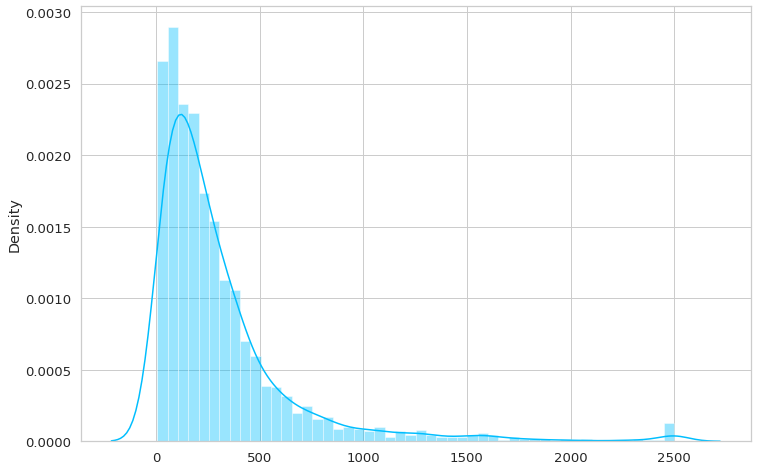

In [21]:
token_lens=[]
for txt in df_clustering.review:
  tokens = tokenizer.encode(txt, max_length=2500,truncation=True)
  token_lens.append(len(tokens))
sns.distplot(token_lens)

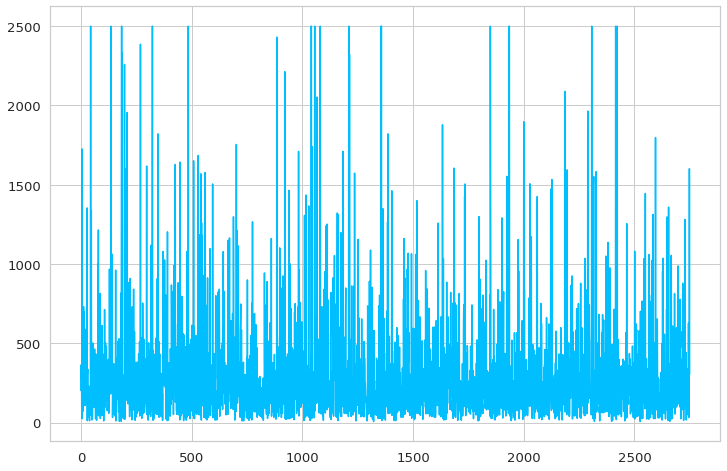

In [22]:
plt.figure()
plt.plot(range(len(token_lens)), token_lens)

In [23]:
from numpy import *
mean(token_lens)

308.7901818181818

In [95]:
benchmark = []
from surprise import SVD, NMF, NormalPredictor, KNNBasic
from surprise.model_selection import KFold, cross_validate
from surprise import Reader
from surprise import Dataset

data_ = Dataset.load_from_df(df3[df3['clustering']!=4].iloc[:,0:3], Reader())
data0 = Dataset.load_from_df(df3[df3['clustering']==0].iloc[:,0:3], Reader())
data1 = Dataset.load_from_df(df3[df3['clustering']==1].iloc[:,0:3], Reader())
data2 = Dataset.load_from_df(df3[df3['clustering']==2].iloc[:,0:3], Reader())
i=0
algos={}
datasets_name=['nonclustering','clustering0','clustering1','clustering2']
for data in [data_, data0, data1, data2]:
  algo_best=None
  for algo in [SVD(), NMF(), NormalPredictor(), KNNBasic()]:
    result = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
    tmp = pd.DataFrame.from_dict(result).mean(axis=0)
    name=str(algo).split(' ')[0].split('.')[-1]+'_'+datasets_name[i]
    tmp = tmp.append(pd.Series([name], index=['algo']))
    if algo_best==None:
      algo_best = tmp['test_rmse']
      algos[datasets_name[i]]=[round(tmp['test_rmse'],3), algo, name]
    elif tmp['test_rmse'] < algo_best:
      algos[datasets_name[i]]=[round(tmp['test_rmse'],3), algo,name]
    benchmark.append(tmp)
  i=i+1

print(algos)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
{'nonclustering': [0.806, <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x7ff545c4cad0>, 'SVD_noncluste

In [25]:
surprise_results= pd.DataFrame(benchmark).set_index('algo')
surprise_results

,test_rmse,fit_time,test_time
algo,,,
SVD_nonclustering,0.798782,0.794288,0.052778
NMF_nonclustering,0.913863,1.184979,0.054137
NormalPredictor_nonclustering,1.320629,0.024025,0.094988
KNNBasic_nonclustering,0.823154,0.317490,1.101712
SVD_clustering0,0.927061,0.264397,0.022534
NMF_clustering0,1.002381,0.428332,0.015591
NormalPredictor_clustering0,1.465214,0.008753,0.074234
KNNBasic_clustering0,0.930299,0.032747,0.137847
SVD_clustering1,0.815990,0.513548,0.044840


In [26]:
surprise_results= pd.DataFrame(benchmark).set_index('algo').sort_values('test_rmse')
surprise_results

,test_rmse,fit_time,test_time
algo,,,
SVD_clustering2,0.719433,0.217523,0.014416
KNNBasic_clustering2,0.746314,0.022938,0.353378
NMF_clustering2,0.779837,0.294039,0.011654
KNNBasic_clustering1,0.797478,0.106754,0.392225
SVD_nonclustering,0.798782,0.794288,0.052778
SVD_clustering1,0.815990,0.513548,0.044840
KNNBasic_nonclustering,0.823154,0.317490,1.101712
NMF_nonclustering,0.913863,1.184979,0.054137
SVD_clustering0,0.927061,0.264397,0.022534


In [27]:
'''
from surprise.model_selection import train_test_split, GridSearchCV
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25)
algo=SVD()
prediction=algo.fit(trainset).test(testset)
accuracy.rmse(prediction) 
'为什么要算这个？'
'''

RMSE: 0.6793


'为什么要算这个？'

In [97]:
from collections import defaultdict

def get_n_predictions(predictions,n):
  topN = defaultdict(list)
  for uid, iid, true_r, est, _ in predictions:
    topN[uid].append((iid, est))

  for uid, user_ratings in topN.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    topN[uid]=user_ratings[:n]
  
  return topN

In [100]:
from surprise import accuracy
n=5
values=list(algos.values())
datasets=[data_, data0, data1, data2]
topN_clustering={}
for i in range(len(datasets)):
  data=datasets[i]
  algo_best=values[i][1]
  trainset = data.build_full_trainset() 
  algo_best.fit(trainset)
  testset = trainset.build_anti_testset()
  predictions = algo_best.test(testset)
  print(f'length of prediction:{len(predictions)}')
  #score=accuracy.rmse(predictions)
  #print(f'rmse for {values[i][2]} is: {score}')
  topN=get_n_predictions(predictions, n)
  print(f'len of topN is {len(topN)}')
  if i==0:
    topN0=topN
    #topN= sorted(topN.items(), key=lambda x:x[0]) 
    print(f'top{n} for non_clustering dataset is: {topN}')
    print(len(topN))
  else:
    topN_clustering.update(topN)
#topN_clustering= sorted(topN_clustering.items(), key=lambda x:x[0]) 
print(f'top{n} for clustering dataset is: {topN_clustering}')
print(len(topN_clustering))
    
  

length of prediction:3295458
len of topN is 2750
top5 for non_clustering dataset is: defaultdict(<class 'list'>, {'A2HOI48JK8838M': [('B000J10II4', 4.941651019719971), ('B0047WYO1I', 4.8316743980252435), ('B007NPX4LM', 4.821741490899626), ('B004BWBFSY', 4.80836830788131), ('B00175YVNO', 4.805737912381118)], 'A1YIPEY7HX73S7': [('B0006FMQWO', 5), ('B0006PJRRG', 5), ('B0006PJSES', 5), ('B0007M11XQ', 5), ('B000BOCRVA', 5)], 'A2QCGHIJ2TCLVP': [('B0007CXYAE', 5), ('B000OOSHAM', 5), ('B00103DUZS', 5), ('B00120RRYO', 5), ('B00132CESU', 5)], 'A2R4UNHFJBA6PY': [('B000GSTHZU', 5), ('B000J10II4', 5), ('B000PHTC20', 5), ('B000VNIZGM', 5), ('B000VR2TVK', 5)], 'A1606LA683WZZU': [('B0001EL9BO', 5), ('B000GI3U6C', 5), ('B0014F812E', 5), ('B0015VN6V8', 5), ('B0016P3P9Q', 5)], 'A3R0NQ9E53JHYQ': [('B0007M11XQ', 5), ('B00103DUZS', 5), ('B0015VN6V8', 5), ('B00166M14A', 5), ('B00172BJ3W', 5)], 'A35YXEDATMIJ9S': [('B0007M11XQ', 5), ('B0012SI2EU', 5), ('B00172BJ3W', 5), ('B0015VN6V8', 4.976321608796555), ('B00

In [109]:
#[('A0488385844WNV2OWO9X', [('B00004U9V2', 5), ('B000068DWY', 5), ('B0001EL9BO', 5), ('B0001XDU2Q', 5), ('B0006FMQWO', 5)])..]
#[('A0488385844WNV2OWO9X', [('B00005V50B', 5), ('B0001EL9BO', 5), ('B0002H842C', 5), ('B0002ZW5UQ', 5), ('B0009DVDTU', 5)])..]
# total distinct userid: 2750

userid='A0488385844WNV2OWO9X'
def get_recommendation_score(userid):
  return (topN0[userid], topN_clustering[userid])

def get_recommendation(userid):
  r1=[]
  r2=[]
  for i in range(len(topN0[userid])):
    r1.append(topN0[userid][i][0])
  for i in range(len(topN_clustering[userid])):
    r2.append(topN_clustering[userid][i][0])
  return (r1,r2)

recommendation_nonclustering, recommendation_clustering = get_recommendation(userid)
print(f'recommendation_nonclustering is:{recommendation_nonclustering}')
print(f'recommendation_clustering is: {recommendation_clustering}')

recommendation_nonclustering is:['B0001EL9BO', 'B0001EL5Q8', 'B0001XDU2Q', 'B0002H842C', 'B0006O4M8Q']
recommendation_clustering is: ['B00005V50B', 'B0001EL9BO', 'B0002H842C', 'B0002ZW5UQ', 'B0009DVDTU']
